In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


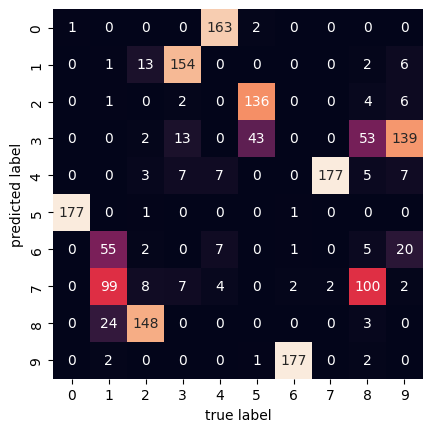

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(digits.target, clusters)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


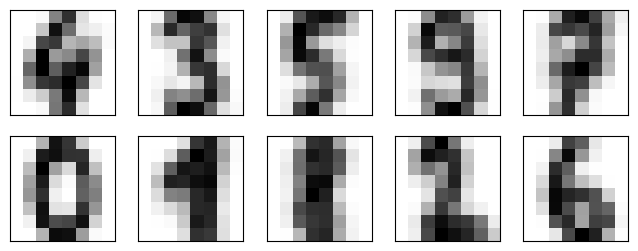

In [ ]:
# Get the cluster centers. They are 64-dimensional points. Reshape them and visualize them as you if they were real digits
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


In [ ]:
# K-means knows nothing about the labels of the clusters, the 0–9 centroids may be permuted when comparing to the real classes. 
# Try to fix the matching each learned cluster label with the true labels
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)


<ipython-input-5-a00b6a627b00>:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


0.7935447968836951

Accuracy: 0.79


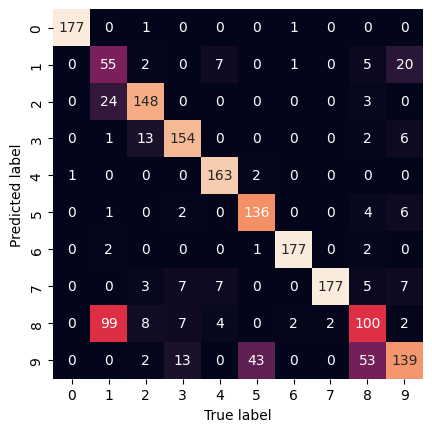

In [ ]:
# Now that we have matched the centroids with the classes, we can check how accurate our unsupervised clustering was in finding similar digits within the data:
# Use sklearn metrics to visualize the accuracy and the confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the accuracy
accuracy = accuracy_score(digits.target, labels)
print("Accuracy: {:.2f}".format(accuracy))

# Compute confusion matrix
mat = confusion_matrix(digits.target, labels)

# Visualize with seaborn
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Calcul de l'indice de silhouette
silhouette_avg = silhouette_score(digits.data, labels)

# Calcul de l'indice de Rand ajusté
ari = adjusted_rand_score(digits.target, labels)

print("Indice de silhouette :", silhouette_avg)
print("Indice de Rand ajusté :", ari)


Indice de silhouette : 0.18251916424600556
Indice de Rand ajusté : 0.668699122362767


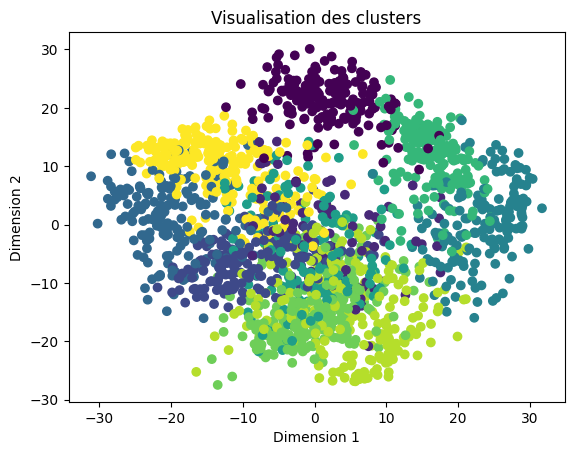

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduction de dimensionnalité avec PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(digits.data)

# Visualisation des clusters
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Visualisation des clusters')
plt.show()


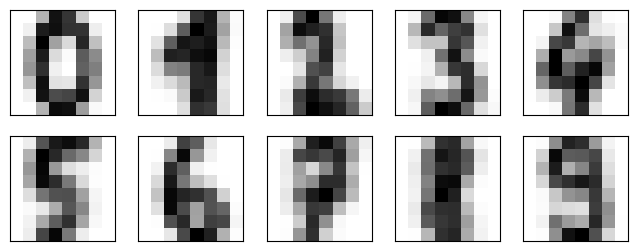

In [14]:
# Analyse des caractéristiques communes des clusters
cluster_features = []

for i in range(10):
    cluster_data = digits.data[labels == i]
    cluster_mean = np.mean(cluster_data, axis=0)
    cluster_features.append(cluster_mean)

# Visualisation des caractéristiques des clusters
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for axi, feature in zip(ax.flat, cluster_features):
    axi.set(xticks=[], yticks=[])
    axi.imshow(feature.reshape(8, 8), cmap=plt.cm.binary)

plt.show()


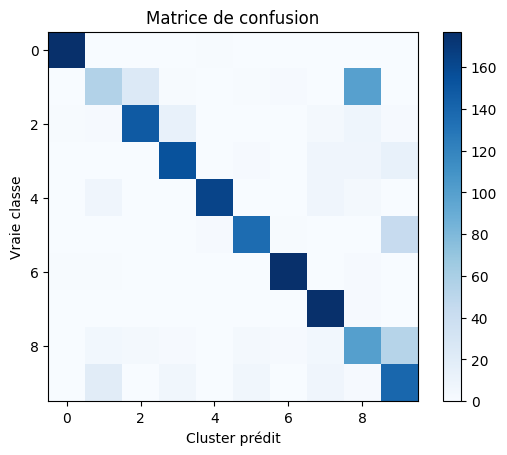

In [15]:
from sklearn.metrics import confusion_matrix

# Calcul de la matrice de confusion
confusion = confusion_matrix(digits.target, labels)

# Affichage de la matrice de confusion
plt.imshow(confusion, cmap='Blues')
plt.colorbar()
plt.xlabel("Cluster prédit")
plt.ylabel("Vraie classe")
plt.title("Matrice de confusion")
plt.show()


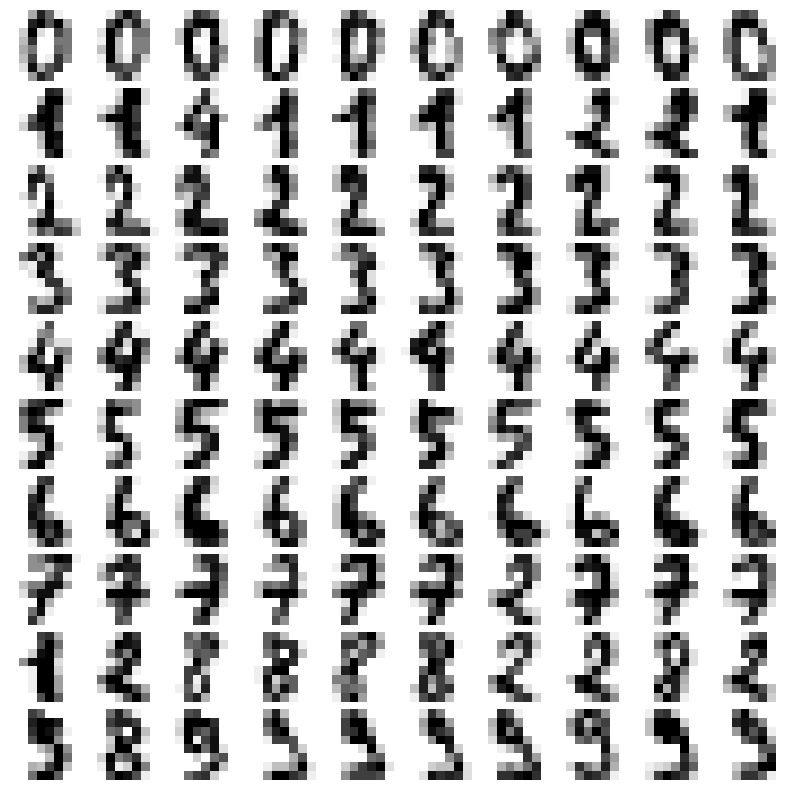

In [16]:
# Création d'un dictionnaire pour stocker les images par cluster
cluster_images = {i: [] for i in range(10)}

# Ajout des images dans le dictionnaire
for i, image in enumerate(digits.images):
    cluster_images[labels[i]].append(image)

# Affichage des images par cluster
fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        ax[i, j].imshow(cluster_images[i][j], cmap=plt.cm.binary)
        ax[i, j].axis('off')

plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

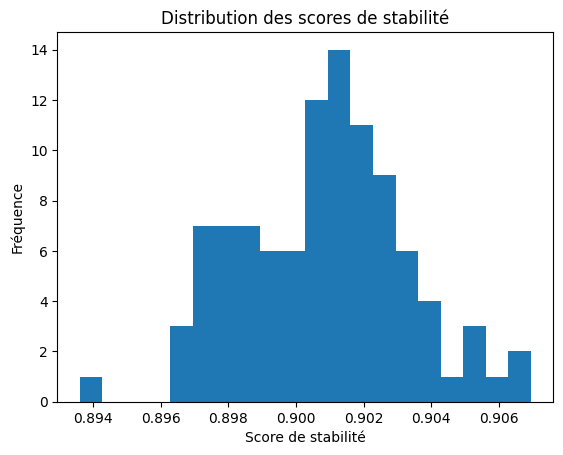

In [17]:
from sklearn.utils import resample
from sklearn.metrics import pairwise_distances

# Bootstrap pour échantillonner les données
n_iterations = 100
stability_scores = []

for _ in range(n_iterations):
    boot_indices = resample(range(len(digits.data)), replace=True)
    boot_data = digits.data[boot_indices]
    boot_labels = labels[boot_indices]
    boot_clusters = KMeans(n_clusters=10).fit_predict(boot_data)
    stability_score = pairwise_distances(boot_labels.reshape(-1, 1), boot_clusters.reshape(-1, 1), metric='hamming')
    stability_scores.append(stability_score.mean())

# Affichage de la distribution des scores de stabilité
plt.hist(stability_scores, bins=20)
plt.xlabel("Score de stabilité")
plt.ylabel("Fréquence")
plt.title("Distribution des scores de stabilité")
plt.show()


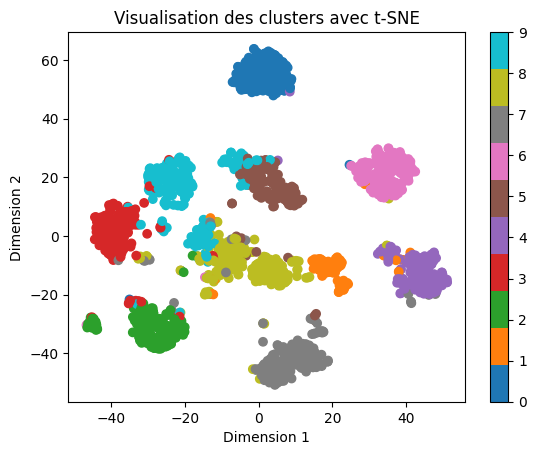

In [18]:
from sklearn.manifold import TSNE

# Réduction de dimension avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings = tsne.fit_transform(digits.data)

# Affichage des clusters dans l'espace réduit
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='tab10')
plt.colorbar()
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("Visualisation des clusters avec t-SNE")
plt.show()


In [19]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# Calcul de l'indice de Rand ajusté
rand_score = adjusted_rand_score(digits.target, labels)

# Calcul de l'information mutuelle ajustée
mutual_info = adjusted_mutual_info_score(digits.target, labels)

print("Indice de Rand ajusté :", rand_score)
print("Information mutuelle ajustée :", mutual_info)


Indice de Rand ajusté : 0.668699122362767
Information mutuelle ajustée : 0.7443265633359025


In [20]:
from sklearn.metrics import silhouette_score

# Calcul de l'indice de silhouette
silhouette_avg = silhouette_score(digits.data, labels)

print("Indice de silhouette moyen :", silhouette_avg)


Indice de silhouette moyen : 0.18251916424600556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

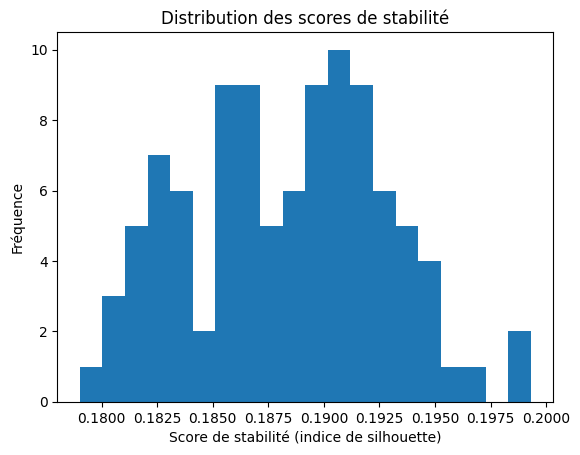

In [21]:
from sklearn.utils import resample

# Bootstrap pour échantillonner les données
n_iterations = 100
stability_scores = []

for _ in range(n_iterations):
    boot_indices = resample(range(len(digits.data)), replace=True)
    boot_data = digits.data[boot_indices]
    boot_labels = labels[boot_indices]
    boot_clusters = KMeans(n_clusters=10).fit_predict(boot_data)
    stability_score = silhouette_score(boot_data, boot_clusters)
    stability_scores.append(stability_score)

# Affichage de la distribution des scores de stabilité
plt.hist(stability_scores, bins=20)
plt.xlabel("Score de stabilité (indice de silhouette)")
plt.ylabel("Fréquence")
plt.title("Distribution des scores de stabilité")
plt.show()
